<a href="https://colab.research.google.com/github/MounikaRasaputra/litter-detection-and-classification/blob/main/litter_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/train.zip

Archive:  /content/train.zip
   creating: train/
   creating: train/litt/
  inflating: train/litt/litter.png   
  inflating: train/litt/litt_10.jpg  
  inflating: train/litt/litt_11.jpg  
  inflating: train/litt/litt_12.jpg  
  inflating: train/litt/litt_13.jpg  
  inflating: train/litt/litt_14.jpg  
  inflating: train/litt/litt_15.jpg  
  inflating: train/litt/litt_16.png  
  inflating: train/litt/litt_17.png  
  inflating: train/litt/litt_2.jpg   
  inflating: train/litt/litt_3.jfif  
  inflating: train/litt/litt_5.jpg   
  inflating: train/litt/litt_6.jpg   
  inflating: train/litt/litt_7.jpg   
  inflating: train/litt/litt_8.jpg   
  inflating: train/litt/litt_9.jpg   
   creating: train/nonlit/
  inflating: train/nonlit/nlitt_1.jfif  
  inflating: train/nonlit/nlitt_10.jfif  
  inflating: train/nonlit/nlitt_2.jfif  
  inflating: train/nonlit/nlitt_3.jfif  
  inflating: train/nonlit/nlitt_4.jfif  
  inflating: train/nonlit/nlitt_5.jfif  
  inflating: train/nonlit/nlitt_6.jfif  
  i

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img


In [ ]:
import keras
import cv2
import os
import glob

datagen = ImageDataGenerator(rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='reflect')


img_dir = "/content/train/litt" # Enter Directory of all images
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
path, dirs, files = next(os.walk("/content/train/litt"))
file_count = len(files) #to find number of files in folder

for batch in datagen.flow (x, batch_size=1, save_to_dir =r'/content/train/litt',save_prefix="litt_",save_format='jpg'):
    i+=1
    if i==600:
      break

In [ ]:
import keras
import cv2
import os
import glob

datagen = ImageDataGenerator(rotation_range =15,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,
                         rescale=1./255,
                         shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip = True,
                         fill_mode = 'nearest',
                         data_format='channels_last',
                         brightness_range=[0.5, 1.5])


img_dir = "/content/train/nonlit" # Enter Directory of all images
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
path, dirs, files = next(os.walk("/content/train/nonlit"))
file_count = len(files) #to find number of files in folder

for batch in datagen.flow (x, batch_size=1, save_to_dir =r'/content/train/nonlit',save_prefix="nlit",save_format='jpg'):
    i+=1
    if i==700:
      break

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_litt_files=os.listdir('/content/train/litt')
len(with_litt_files)

594

In [ ]:
print(with_litt_files[0:5])

['litt__0_8663.jpg', 'litt__0_595.jpg', 'litt__0_2497.jpg', 'litt__0_2957.jpg', 'litt__0_4893.jpg']


In [ ]:
without_litt_files=os.listdir('/content/train/nonlit')
print(len(without_litt_files))
print(without_litt_files[0:5])

691
['nlit_0_7942.jpg', 'nlit_0_638.jpg', 'nlit_0_9974.jpg', 'nlit_0_302.jpg', 'nlit_0_2181.jpg']


In [ ]:
#labels
with_litt_labels=[1]*594
without_litt_labels=[0]*691

In [ ]:
print(with_litt_labels)
print(without_litt_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
labels=with_litt_labels+without_litt_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

1285
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


TypeError: ignored

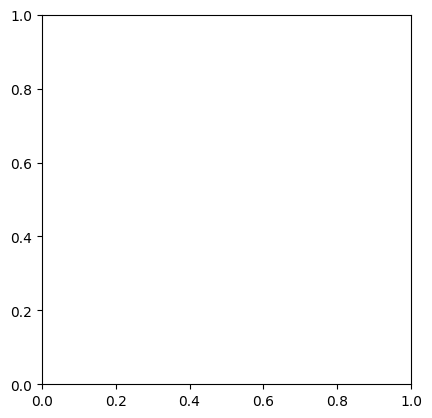

In [ ]:

img=cv2.imread('/content/train/litt/litt__0_3878.jpg')
plt.imshow(img)

In [ ]:
img=mpimage.imread('/content/train/litt/litt__0_2297.jpg')
plt.imshow(img)
plt.show()

In [ ]:
#image processing
#resizing and converting into numpy

# convert images to numpy arrays+

with_litt_path = '/content/train/litt/'

data = []

for img_file in with_litt_files:

  image = Image.open(with_litt_path + img_file)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_litt_path = '/content/train/nonlit/'


for img_file in without_litt_files:

  image = Image.open(without_litt_path + img_file)
  image = image.resize((256,256))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
len(data)

1285

In [ ]:
data[0]

array([[[ 73,  51,   8],
        [ 62,  42,   1],
        [ 53,  34,   0],
        ...,
        [ 51,  39,   2],
        [ 53,  38,   5],
        [ 52,  36,   3]],

       [[ 74,  53,  10],
        [ 69,  49,   7],
        [ 56,  37,   1],
        ...,
        [ 50,  37,   0],
        [ 52,  38,   3],
        [ 52,  36,   3]],

       [[ 77,  56,  12],
        [ 77,  57,  14],
        [ 64,  45,   3],
        ...,
        [ 54,  41,   1],
        [ 54,  38,   3],
        [ 52,  36,   3]],

       ...,

       [[ 75,  62,   0],
        [ 74,  60,   0],
        [ 76,  62,   1],
        ...,
        [100,  77,   0],
        [100,  77,   0],
        [101,  78,   0]],

       [[ 75,  61,   0],
        [ 77,  63,   0],
        [ 77,  63,   0],
        ...,
        [ 99,  76,   0],
        [100,  77,   0],
        [100,  77,   0]],

       [[ 77,  61,   0],
        [ 78,  62,   0],
        [ 79,  63,   1],
        ...,
        [ 99,  76,   0],
        [ 99,  76,   0],
        [ 99,  76,   0]]

In [ ]:
data[0].shape

(256, 256, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(1285, 256, 256, 3)
(1285,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1285, 256, 256, 3) (1028, 256, 256, 3) (257, 256, 256, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[243, 194,  98],
        [250, 205, 111],
        [241, 201, 110],
        ...,
        [247, 180,  50],
        [253, 188,  64],
        [255, 191,  68]],

       [[241, 193,  96],
        [248, 203, 109],
        [243, 202, 111],
        ...,
        [254, 186,  59],
        [255, 188,  67],
        [253, 185,  65]],

       [[240, 192,  93],
        [247, 202, 106],
        [244, 204, 111],
        ...,
        [254, 185,  62],
        [251, 180,  62],
        [241, 170,  53]],

       ...,

       [[206,  99,   3],
        [205,  98,   2],
        [204,  96,   1],
        ...,
        [169,  71,   0],
        [172,  74,   0],
        [175,  77,   1]],

       [[202,  97,   3],
        [200,  95,   1],
        [200,  94,   1],
        ...,
        [169,  71,   0],
        [171,  73,   0],
        [174,  76,   0]],

       [[199,  95,   2],
        [199,  95,   2],
        [202,  96,   4],
        ...,
        [169,  71,   0],
        [170,  72,   0],
        [173,  76,   0]]

In [ ]:
X_train_scaled[0]

array([[[0.95294118, 0.76078431, 0.38431373],
        [0.98039216, 0.80392157, 0.43529412],
        [0.94509804, 0.78823529, 0.43137255],
        ...,
        [0.96862745, 0.70588235, 0.19607843],
        [0.99215686, 0.7372549 , 0.25098039],
        [1.        , 0.74901961, 0.26666667]],

       [[0.94509804, 0.75686275, 0.37647059],
        [0.97254902, 0.79607843, 0.42745098],
        [0.95294118, 0.79215686, 0.43529412],
        ...,
        [0.99607843, 0.72941176, 0.23137255],
        [1.        , 0.7372549 , 0.2627451 ],
        [0.99215686, 0.7254902 , 0.25490196]],

       [[0.94117647, 0.75294118, 0.36470588],
        [0.96862745, 0.79215686, 0.41568627],
        [0.95686275, 0.8       , 0.43529412],
        ...,
        [0.99607843, 0.7254902 , 0.24313725],
        [0.98431373, 0.70588235, 0.24313725],
        [0.94509804, 0.66666667, 0.20784314]],

       ...,

       [[0.80784314, 0.38823529, 0.01176471],
        [0.80392157, 0.38431373, 0.00784314],
        [0.8       , 0

In [ ]:
#Convolution neural network
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [ ]:
#training
#history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

#training
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
29/29 [==============================] - 15s 96ms/step - loss: 147.5258 - acc: 0.8324 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 2/10
29/29 [==============================] - 2s 53ms/step - loss: 2.6108 - acc: 0.9870 - val_loss: 0.2181 - val_acc: 0.9709
Epoch 3/10
29/29 [==============================] - 1s 49ms/step - loss: 0.5278 - acc: 0.9632 - val_loss: 0.0537 - val_acc: 0.9709
Epoch 4/10
29/29 [==============================] - 1s 49ms/step - loss: 0.1682 - acc: 0.9762 - val_loss: 0.0292 - val_acc: 0.9709
Epoch 5/10
29/29 [==============================] - 1s 48ms/step - loss: 0.0617 - acc: 0.9892 - val_loss: 0.0260 - val_acc: 1.0000
Epoch 6/10
29/29 [==============================] - 1s 48ms/step - loss: 0.0287 - acc: 0.9870 - val_loss: 0.0274 - val_acc: 0.9903
Epoch 7/10
29/29 [==============================] - 1s 47ms/step - loss: 0.0589 - acc: 0.9924 - val_loss: 0.0306 - val_acc: 1.0000
Epoch 8/10
29/29 [==============================] - 1s 48ms/step - loss: 0.0

In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

9/9 [==============================] - 0s 28ms/step - loss: 0.0257 - acc: 0.9883
0.9883268475532532


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (256,256))

#input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_resized, [1,256,256,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('LITTER is detected')
  img=input_image

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  # Apply thresholding to create a binary image
  _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # Find contours in the binary image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Loop through each contour
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    bbox = img[y:y+h, x:x+w]

    # Convert the cropped image to grayscale
    bbox_gray = cv2.cvtColor(bbox, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, bbox_thresh = cv2.threshold(bbox_gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    bbox_contours, _ = cv2.findContours(bbox_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through each contour in the bounding box
    for bbox_contour in bbox_contours:
        # Get the bounding box around the contour
        bx, by, bw, bh = cv2.boundingRect(bbox_contour)

        # Draw a bounding box around the litter particle code on the original image
        cv2.rectangle(img, (x+bx, y+by), (x+bx+bw, y+by+bh), (0, 255, 0), 2)

# Display the result
  cv2_imshow( img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  print('no litt')




Path of the image to be predicted: /content/images mrino.jpg


NameError: ignored

Path of the image to be predicted: /content/nolitt_4.jpeg


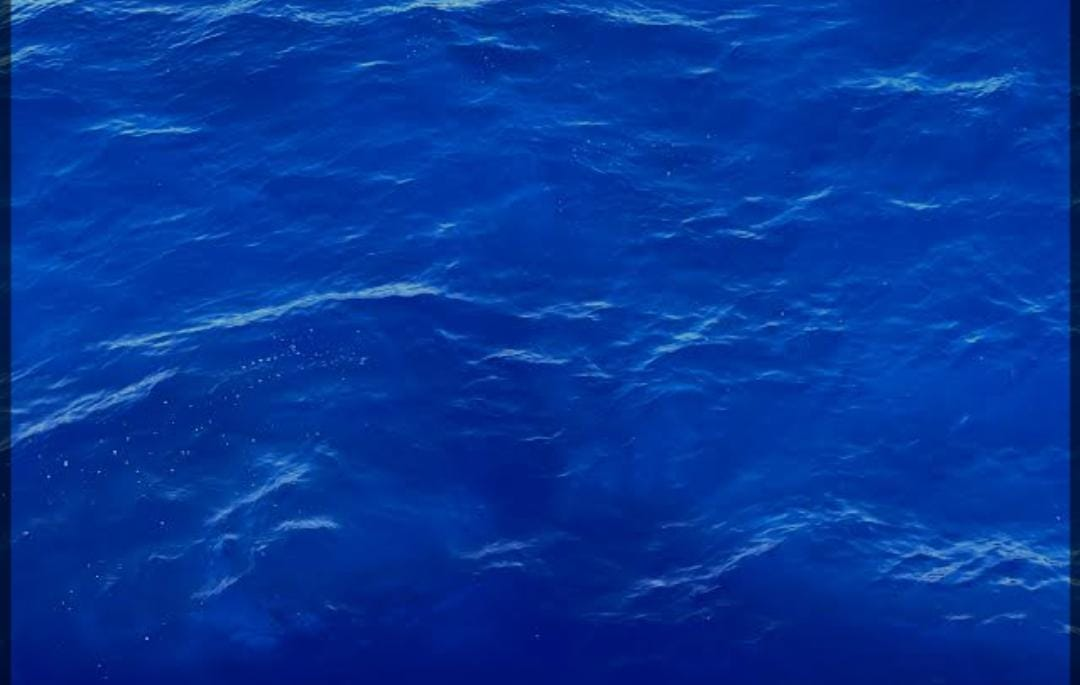

1/1 [==============================] - 0s 25ms/step
[[1. 0.]]
0
no litt


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (256,256))

#input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_resized, [1,256,256,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('LITTER is detected')
  img=input_image

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


  # Apply thresholding to create a binary image
  _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # Find contours in the binary image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Loop through each contour
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    bbox = img[y:y+h, x:x+w]

    # Convert the cropped image to grayscale
    bbox_gray = cv2.cvtColor(bbox, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to create a binary image
    _, bbox_thresh = cv2.threshold(bbox_gray, 127, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    bbox_contours, _ = cv2.findContours(bbox_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through each contour in the bounding box
    for bbox_contour in bbox_contours:
        # Get the bounding box around the contour
        bx, by, bw, bh = cv2.boundingRect(bbox_contour)

        # Draw a bounding box around the litter particle code on the original image
        cv2.rectangle(img, (x+bx, y+by), (x+bx+bw, y+by+bh), (0, 255, 0), 2)

# Display the result
  cv2_imshow( img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  print('no litt')




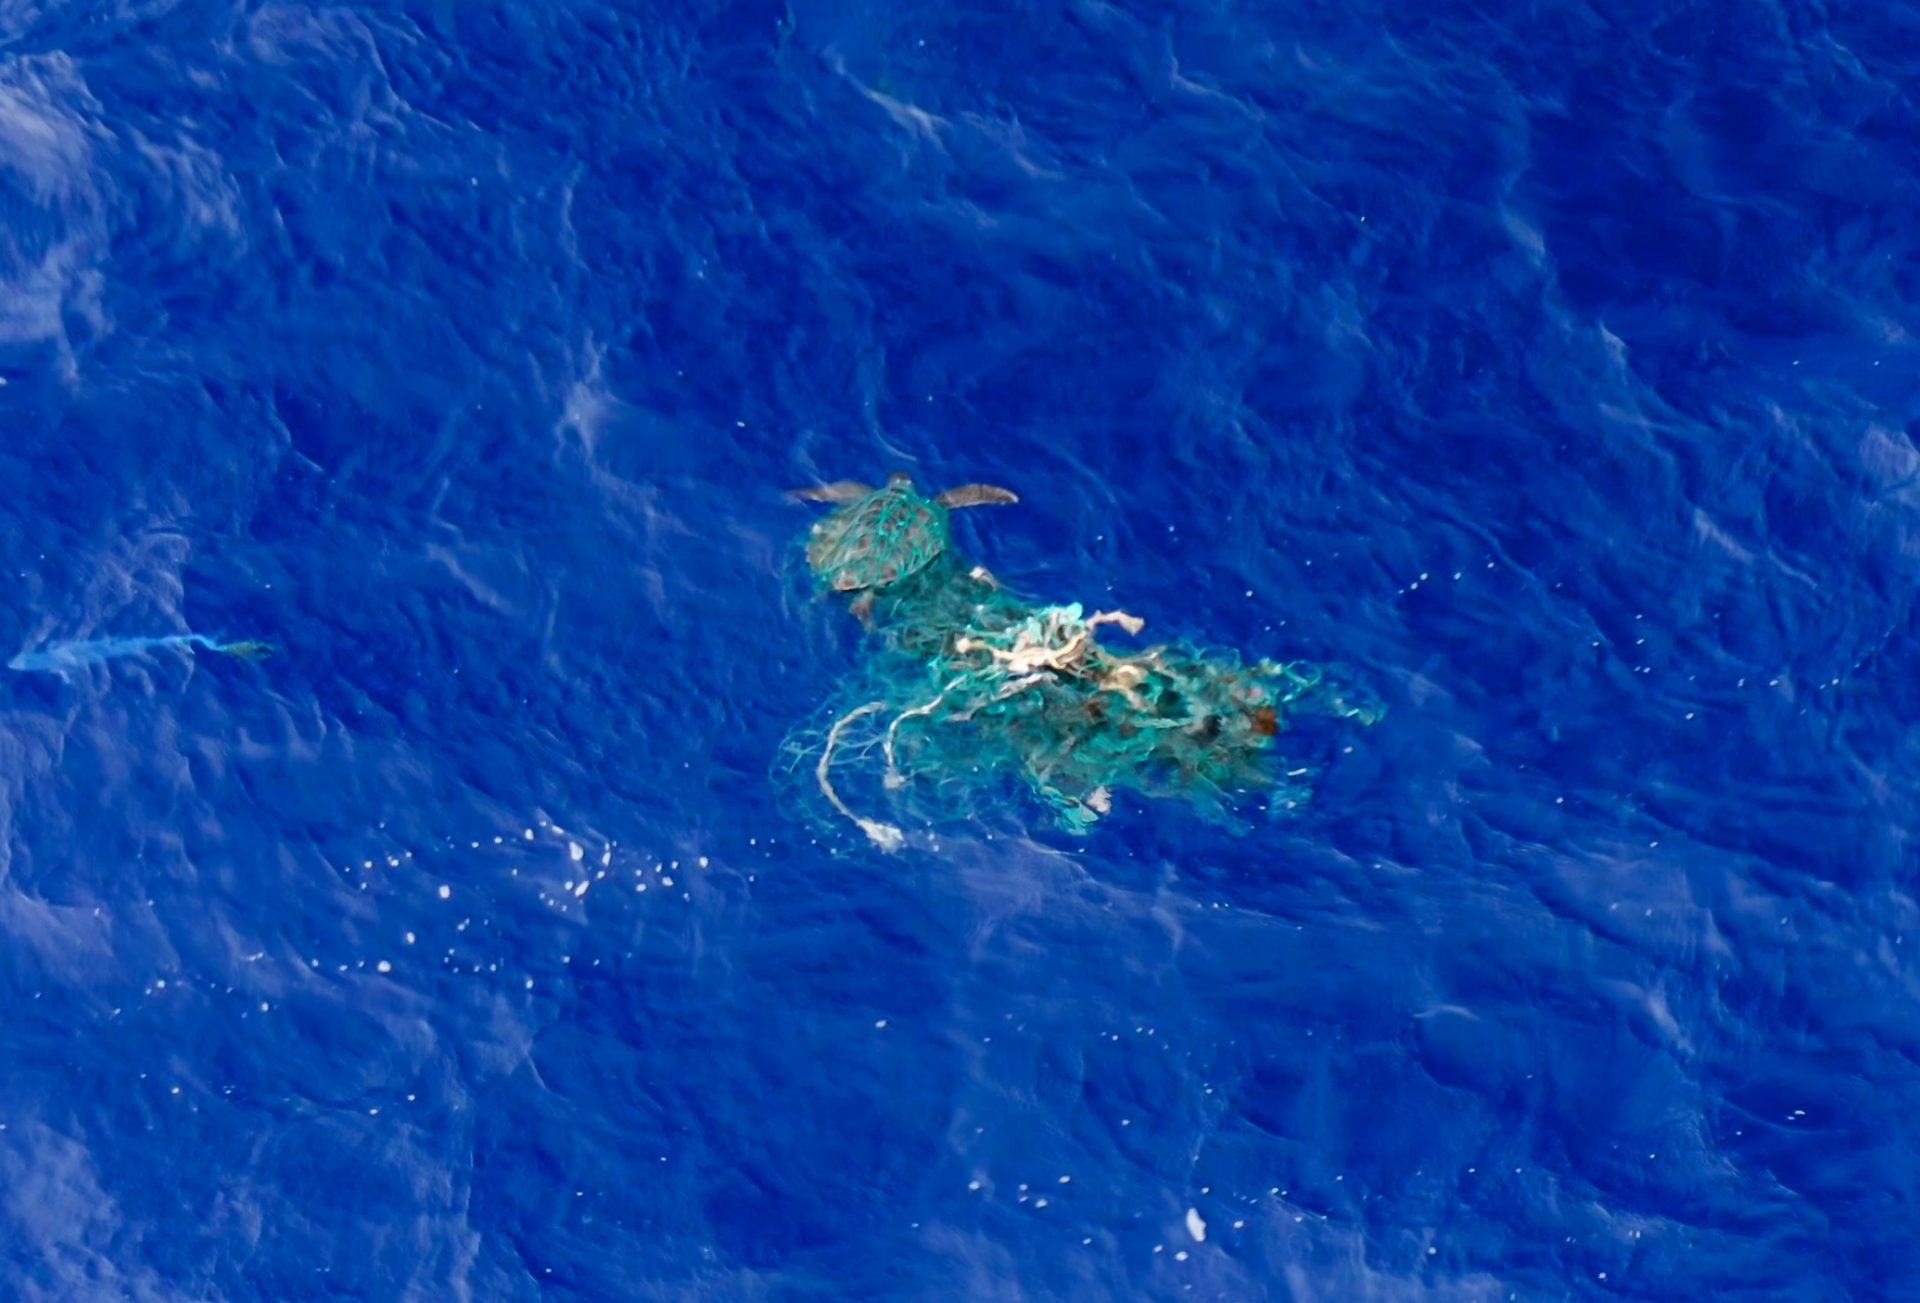

1/1 [==============================] - 0s 29ms/step
[[1. 0.]]
0
no litt
